
# Foundation of Data Science Project
# COVID-19 Data Analysis 




In [80]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.preprocessing import MinMaxScaler



sns.set_style("whitegrid")  
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 18
warnings.filterwarnings('ignore')

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

##  DATA UNDERSTANDING AND PREPROCESSING

This section covers data loading, inspection, cleaning, and transformation.

In [ ]:
def load_and_inspect_data(file_path):
   
    print(f"Loading data from {file_path}...")
    df = pd.read_csv(file_path)
    
    print("\n--- Dataset Overview ---")
    print(f"Shape: {df.shape}")
    print("\nFirst 5 rows:")
    display(df.head())
    

    
    print("\nData types:")
    print(df.dtypes)
    
    print("\nSummary statistics:")
    display(df.describe())
    
    return df

# Load COVID-19 confirmed cases data
covid_data = load_and_inspect_data('Datasets/confirmed.csv')

# Filter for Nepal data
nepal_data = covid_data[covid_data['Country/Region'] == 'Nepal']

# Display Nepal data
print("\n--- Nepal Data ---")
display(nepal_data)


First 5 rows:


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/


...

Data types:
Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/5/23              int64
3/6/23              int64
3/7/23              int64
3/8/23              int64
3/9/23              int64
Length: 1147, dtype: object

Summary statistics:


Lat    Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20   2/2/20   2/3/20   2/4/20   2/5/20   2/6/20   2/7/20   2/8/20   2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20   3/1/20   3/2/20   3/3/20   3/4/20   3/5/20   3/6/20   3/7/20   3/8/20   3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  3/25/20  3/26/20   3/27/20   3/28/20   3/29/20   3/30/20   3/31/20    4/1/20    4/2/20    4/3/20    4/4/20    4/5/20    4/6/20    4/7/20    4/8/20    4/9/20   4/10/20   4/11/20   4/12/20   4/13/20   4/14/20   4/15/20   4/16/20   4/17/20   4/18/20   4/19/20   4/20/20   4/21/20   4/22/20   4/23/20   4/24/20   4/25/20   4/26/20    4/27/20    4/28/20    4/29/20    4/30/20     5/1/20     5/2/20     5/3/20  \
count 287.00  287.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00  289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00   289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00    289.00     289.00     289.00     289.00     289.00     289.00     289.00     289.00   
mean   19.72   22.18     1.93     2.27     3.27     4.97     7.34    10.13    19.31    21.35    28.50    34.35   41.65    58.09    68.81    82.70    95.65   106.60   119.03   128.48   138.97   148.00   155.07   156.51   208.94   231.53   238.94   246.50   253.54   260.05   261.78   263.72   265.90   272.00   273.32   275.29   278.24   281.61   286.26   291.18   297.66   305.89   312.74   321.78   329.89   339.37   353.16   367.47   380.61   395.47   411.94   437.81   461.19   506.84   544.52   583.38   633.79   686.29   747.06   840.79   942.97  1055.17  1173.55  1320.80  1465.72  1643.86  1854.29   2075.50   2316.27   2511.83   2736.78   3008.20   3307.02   3592.30   3883.69   4091.72   4339.87   4598.44   4836.98   5121.32   5422.99   5722.02   5983.32   6393.64   6642.19   6935.04   7205.82   7532.70   7836.78   8107.55   8371.64   8636.28   8899.56   9183.43   9469.65   9758.79  10046.70  10291.66   10537.28   10799.68   11067.25   11356.70   11664.47   11935.28   12191.32   
std    25.96   77.87    26.17    26.27    32.71    45.52    63.62    85.72   210.33   211.63   291.63   345.76  425.47   661.17   799.26   985.04  1160.79  1304.87  1472.01  1598.38  1747.16  1870.45  1966.79  1967.12  2838.13  3202.38  3310.75  3424.39  3530.60  3630.12  3650.66  3674.81  3687.81  3771.36  3771.41  3783.41  3812.79  3836.56  3861.17  3880.82  3907.57  3943.30  3957.59  3969.49  3980.49  3994.06  4010.64  4027.38  4043.17  4062.12  4077.38  4109.43  4150.31  4209.30  4287.82  4377.82  4486.68  4612.54  4779.77  5046.93  5376.02  5786.06  6226.23  6823.94  7448.06  8250.37  9299.50  10429.23  11739.91  12771.33  14090.60  15653.13  17667.86  19543.21  21467.53  23194.33  24900.18  26751.71  28494.43  30373.14  32495.19  34524.24  36278.54  38182.66  39800.82  41608.62  43223.72  45159.10  47149.18  48789.64  50344.13  52132.48  53719.17  55524.91  57412.25  59151.57  60973.25  62511.22   64011.23   65513.84   67119.98   68884.68   70944.17   72550.46   73986.07   
min   -71.95 -178.12     0.00

In [82]:
print("\n--- Data Structure Analysis ---")
print(f"Number of countries/regions: {covid_data['Country/Region'].nunique()}")
print(f"Number of provinces/states: {covid_data['Province/State'].nunique()}")
print(f"Date range: From {covid_data.columns[4]} to {covid_data.columns[-1]}")


--- Data Structure Analysis ---
Number of countries/regions: 201
Number of provinces/states: 91
Date range: From 1/22/20 to 3/9/23


### 3.1 Types of data: Structured, unstructured, semi-structured

In [83]:
print("This dataset is STRUCTURED data in tabular format with:")
print("- Geographic identifiers (Country/Region, Province/State)")
print("- Geospatial coordinates (Lat, Long)")
print("- Time series data (daily confirmed cases)")

This dataset is STRUCTURED data in tabular format with:
- Geographic identifiers (Country/Region, Province/State)
- Geospatial coordinates (Lat, Long)
- Time series data (daily confirmed cases)


### 3.2-3.4 Data Preprocessing & Cleaning

In [ ]:
def preprocess_covid_data(df):
    """
    Preprocessing  COVID-19 data by:
    1. Reshaping from wide to long format
    2. Converting date columns to proper datetime
    3. Handling missing values
    4. Creating aggregated country-level data
    """
    print("Preprocessing COVID-19 data...")
    
    preprocessed_df = df.copy()
    
    # Drop unnecessary columns
    preprocessed_df.drop(columns=['Province/State', 'Lat', 'Long'], inplace=True)
    #here inplace=True is used to modify the original DataFrame without creating a copy
    
    # 1. Check and handle missing values
    print(f"\nMissing values before cleaning:")
    print(preprocessed_df.isnull().sum().sum())
    
    # The first .sum() computes the sum of missing values for each column, and the second .sum() computes the total across all columns.
    
    # 2. Reshape data from wide to long format
    print("\nReshaping data from wide to long format...")
    geo_cols = ['Country/Region']
    
    date_cols = preprocessed_df.columns[1:]  # everything after 'Country/Region'
    long_df = pd.melt(
        preprocessed_df, 
        id_vars=geo_cols, #geo cols to keep as identifiers and remain unchanged
        value_vars=date_cols, 
        var_name='Date',
        value_name='Confirmed'
    )
    
    # 3. Convert date strings to datetime objects 01/22/20 type formatting
    long_df['Date'] = pd.to_datetime(long_df['Date'], format='%m/%d/%y')
    
    # 4. Ensure confirmed cases are numeric
    long_df['Confirmed'] = pd.to_numeric(long_df['Confirmed'], errors='coerce').fillna(0).astype(int)
        # Ensures the 'Confirmed' column contains numeric values:
            # pd.to_numeric() converts values to numbers
            # errors='coerce' turns problematic values into NaN
            # fillna(0) replaces any NaN values with zero
            # astype(int) converts everything to integers
    
    # 5. Create a country-level aggregated dataset
    print("\nCreating country-level aggregated dataset...")
    country_df = long_df.groupby(['Country/Region', 'Date'])['Confirmed'].sum().reset_index() # ensures one row per country per data
    
    # 6. Sort  countries and then by date in asceinding order and calculate daily new cases
    country_df = country_df.sort_values(['Country/Region', 'Date'])
    country_df['Daily_New_Cases'] = country_df.groupby('Country/Region')['Confirmed'].diff().fillna(0)
    country_df['Daily_New_Cases'] = country_df['Daily_New_Cases'].apply(lambda x: max(0, x)) # ensures no negative values
    
    # 7. Calculate rolling averages of 7 days . meaning average in like day(0) day(0,1 ) day(0,1,2) day(0,1,2,3) day(0,1,2,3,4) day(0,1,2,3,4,5) day(0,1,2,3,4,5,6) and so on.
    country_df['7_Day_Avg_New_Cases'] = country_df.groupby('Country/Region')['Daily_New_Cases'].transform(
        lambda x: x.rolling(7, min_periods=1).mean()
    )
    
    print("\nData preprocessing completed!")
    print(f"Long format shape: {long_df.shape}")
    print(f"Country-level aggregated data shape: {country_df.shape}")
    
    return long_df, country_df

# Apply preprocessing
covid_long_df, covid_country_df = preprocess_covid_data(covid_data)


Preprocessing COVID-19 data...

Missing values before cleaning:
0

Reshaping data from wide to long format...

Creating country-level aggregated dataset...

Data preprocessing completed!
Long format shape: (330327, 3)
Country-level aggregated data shape: (229743, 5)


In [47]:
# Display the preprocessed data
print("--- Preprocessed Data Sample (Long Format) ---")
display(covid_long_df.head())

print("\n--- Preprocessed Data Sample (Country-Level) - Nepal ---")
display(covid_country_df[covid_country_df['Country/Region'] == 'Nepal'].head())

--- Preprocessed Data Sample (Long Format) ---


,Country/Region,Date,Confirmed
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0



--- Preprocessed Data Sample (Country-Level) - Nepal ---


,Country/Region,Date,Confirmed,Daily_New_Cases,7_Day_Avg_New_Cases
145161,Nepal,2020-01-22,0,0.00,0.00
145162,Nepal,2020-01-23,0,0.00,0.00
145163,Nepal,2020-01-24,0,0.00,0.00
145164,Nepal,2020-01-25,1,1.00,0.25
145165,Nepal,2020-01-26,1,0.00,0.20


### 3.5-3.6 Data Wrangling, Enrichment & Validation

In [63]:
def enrich_covid_data(df):
    """
    Enrich COVID-19 data with additional features:
    1. Extract month and year for temporal analysis
    2. Calculate metrics like infection rate and growth rate
    3. Add categorical variables for high/medium/low infection periods
    
    Parameters:
    -----------
    df : pd.DataFrame
        Preprocessed country-level COVID-19 dataframe
        
    Returns:
    --------
    pd.DataFrame
        Enriched dataframe
    """
    print("Enriching COVID-19 data with additional features...")
    
    # Create a copy of the dataframe
    enriched_df = df.copy()
    
    # 1. Extract temporal features
    enriched_df['Year'] = enriched_df['Date'].dt.year
    enriched_df['Month'] = enriched_df['Date'].dt.month
    enriched_df['Week'] = enriched_df['Date'].dt.isocalendar().week
    enriched_df['DayOfWeek'] = enriched_df['Date'].dt.dayofweek
    
    # 2. Calculate infection rate (rolling 7-day average of new cases)
    enriched_df['Infection_Rate'] = enriched_df['Daily_New_Cases'].rolling(7).mean()
    
    # 3. Calculate growth rate (percentage change)
    # Fixing the error by applying the growth rate calculation correctly
    enriched_df['Growth_Rate'] = enriched_df.groupby('Country/Region')['Confirmed'].apply(
        lambda x: x.replace(0, np.nan).pct_change().replace([np.inf, -np.inf], np.nan).fillna(0) * 100
    ).reset_index(level=0, drop=True)  # Reset index to align with the original dataframe
    
    # 4. Calculate infection ratio (new cases divided by total confirmed cases)
    enriched_df['Infection_Ratio'] = enriched_df['Daily_New_Cases'] / enriched_df['Confirmed'].replace(0, 1)
    
    # 5. Add categorical variables (based on 7-day average of new cases)
    conditions = [
        (enriched_df['7_Day_Avg_New_Cases'] == 0),
        (enriched_df['7_Day_Avg_New_Cases'] > 0) & (enriched_df['7_Day_Avg_New_Cases'] <= 100),
        (enriched_df['7_Day_Avg_New_Cases'] > 100) & (enriched_df['7_Day_Avg_New_Cases'] <= 1000),
        (enriched_df['7_Day_Avg_New_Cases'] > 1000)
    ]
    choices = ['No Cases', 'Low', 'Medium', 'High']
    enriched_df['Infection_Level'] = np.select(conditions, choices, default='Unknown')
    
    # 6. Validate data: Check for missing values
    missing_values = enriched_df.isnull().sum()
    print("\nMissing values after enrichment:")
    print(missing_values[missing_values > 0])
    
    # Fill missing values with 0 for numeric columns
    numeric_cols = enriched_df.select_dtypes(include=[np.number]).columns
    enriched_df[numeric_cols] = enriched_df[numeric_cols].fillna(0)
    
    print("\nData enrichment completed!")
    return enriched_df

# Enrich the country-level data
covid_enriched_df = enrich_covid_data(covid_country_df)

# Display the enriched data
print("\n--- Enriched Data Sample ---")
display(covid_enriched_df.head())

# Display the enriched data for Nepal only
print("\n--- Enriched Data Sample (Nepal) ---")
display(covid_enriched_df[covid_enriched_df['Country/Region'] == 'Nepal'].head())


Enriching COVID-19 data with additional features...

Missing values after enrichment:
Infection_Rate    6
dtype: int64

Data enrichment completed!

--- Enriched Data Sample ---


,Country/Region,Date,Confirmed,Daily_New_Cases,7_Day_Avg_New_Cases,Year,Month,Week,DayOfWeek,Infection_Rate,Growth_Rate,Infection_Ratio,Infection_Level
0,Afghanistan,2020-01-22,0,0.00,0.00,2020,1,4,2,0.00,0.00,0.00,No Cases
1,Afghanistan,2020-01-23,0,0.00,0.00,2020,1,4,3,0.00,0.00,0.00,No Cases
2,Afghanistan,2020-01-24,0,0.00,0.00,2020,1,4,4,0.00,0.00,0.00,No Cases
3,Afghanistan,2020-01-25,0,0.00,0.00,2020,1,4,5,0.00,0.00,0.00,No Cases
4,Afghanistan,2020-01-26,0,0.00,0.00,2020,1,4,6,0.00,0.00,0.00,No Cases



--- Enriched Data Sample (Nepal) ---


,Country/Region,Date,Confirmed,Daily_New_Cases,7_Day_Avg_New_Cases,Year,Month,Week,DayOfWeek,Infection_Rate,Growth_Rate,Infection_Ratio,Infection_Level
145161,Nepal,2020-01-22,0,0.00,0.00,2020,1,4,2,0.00,0.00,0.00,No Cases
145162,Nepal,2020-01-23,0,0.00,0.00,2020,1,4,3,0.00,0.00,0.00,No Cases
145163,Nepal,2020-01-24,0,0.00,0.00,2020,1,4,4,0.00,0.00,0.00,No Cases
145164,Nepal,2020-01-25,1,1.00,0.25,2020,1,4,5,0.14,0.00,1.00,Low
145165,Nepal,2020-01-26,1,0.00,0.20,2020,1,4,6,0.14,0.00,0.00,Low


### 3.7-3.8 Data Transformation & Dimensionality Reduction

In [64]:
# Select top 20 countries by total confirmed cases
top_countries = covid_enriched_df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(20).index
top_countries_df = covid_enriched_df[covid_enriched_df['Country/Region'].isin(top_countries)].copy()

print(f"Selected top 20 countries by total confirmed cases:")
print(top_countries.tolist())

# Normalize data for comparison across countries
print("\nNormalizing data for comparison across countries...")

Selected top 20 countries by total confirmed cases:
['US', 'India', 'France', 'Germany', 'Brazil', 'Japan', 'Korea, South', 'Italy', 'United Kingdom', 'Russia', 'Turkey', 'Spain', 'Vietnam', 'Australia', 'Argentina', 'Taiwan*', 'Netherlands', 'Iran', 'Mexico', 'Indonesia']

Normalizing data for comparison across countries...


In [65]:
def normalize_for_comparison(df, countries, target_columns):
    """
    Normalize data for each country to enable fair comparison
    
    Parameters:
    -----------
    df : pd.DataFrame
        Enriched dataframe
    countries : list
        List of countries to normalize
    target_columns : list
        List of columns to normalize
        
    Returns:
    --------
    pd.DataFrame
        Dataframe with normalized columns
    """
    normalized_df = df[df['Country/Region'].isin(countries)].copy()
    
    # Create a scaler
    scaler = MinMaxScaler()
    
    # Normalize each column for each country
    for country in countries:
        country_mask = normalized_df['Country/Region'] == country
        for column in target_columns:
            # Get the values for this country and column
            values = normalized_df.loc[country_mask, column].values
            
            # Replace infinities and NaNs with 0
            values = np.nan_to_num(values, nan=0.0, posinf=0.0, neginf=0.0)
            
            # Skip if all values are the same (would cause division by zero in scaling)
            if len(values) == 0 or np.min(values) == np.max(values):
                normalized_df.loc[country_mask, f'Normalized_{column}'] = 0.5  # Set to middle value
                continue
                
            # Reshape for the scaler and transform
            values = values.reshape(-1, 1)
            try:
                normalized_values = scaler.fit_transform(values)
                normalized_df.loc[country_mask, f'Normalized_{column}'] = normalized_values
            except ValueError:
                # If scaling fails, manually normalize to 0-1 range
                min_val = np.min(values)
                max_val = np.max(values)
                if min_val == max_val:
                    normalized_values = np.zeros(values.shape)
                else:
                    normalized_values = (values - min_val) / (max_val - min_val)
                normalized_df.loc[country_mask, f'Normalized_{column}'] = normalized_values
    
    return normalized_df

# Columns to normalize
columns_to_normalize = ['Confirmed', 'Daily_New_Cases', '7_Day_Avg_New_Cases', 'Growth_Rate']

# Fix any problematic values in the source data
for column in columns_to_normalize:
    top_countries_df[column] = top_countries_df[column].replace([np.inf, -np.inf], np.nan)
    top_countries_df[column] = top_countries_df[column].fillna(0)

# Apply normalization
try:
    normalized_df = normalize_for_comparison(top_countries_df, top_countries, columns_to_normalize)
    print("\n--- Normalized Data Sample ---")
    print(normalized_df.head().to_string())  # Using print instead of display
except Exception as e:
    print(f"Error during normalization: {e}")
    # Create a simplified version without normalization as a fallback
    normalized_df = top_countries_df.copy()
    print("\n--- Data Sample (normalization failed) ---")
    print(normalized_df.head().to_string())


--- Normalized Data Sample ---
     Country/Region       Date  Confirmed  Daily_New_Cases  7_Day_Avg_New_Cases  Year  Month  Week  DayOfWeek  Infection_Rate  Growth_Rate  Infection_Ratio Infection_Level  Normalized_Confirmed  Normalized_Daily_New_Cases  Normalized_7_Day_Avg_New_Cases  Normalized_Growth_Rate
8001      Argentina 2020-01-22          0             0.00                 0.00  2020      1     4          2            0.00         0.00             0.00        No Cases                  0.00                        0.00                            0.00                    0.00
8002      Argentina 2020-01-23          0             0.00                 0.00  2020      1     4          3            0.00         0.00             0.00        No Cases                  0.00                        0.00                            0.00                    0.00
8003      Argentina 2020-01-24          0             0.00                 0.00  2020      1     4          4            0.00         

## SECTION 4: DATA ANALYSIS

This section covers descriptive analytics, exploratory data analysis, and data visualization.

### 4.1-4.2 Descriptive Analytics & Exploratory Data Analysis

In [66]:
def perform_descriptive_analysis(df, column_name='Confirmed'):
    """
    Perform descriptive statistical analysis on a column
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame to analyze
    column_name : str
        Column to analyze
    """
    print(f"\nDescriptive statistics for {column_name}:")
    stats_df = df.groupby('Country/Region')[column_name].describe()
    print(stats_df.head().to_string())  # Using print instead of display
    
    # Additional statistics
    print("\nSkewness and Kurtosis (indicating distribution shape):")
    
    # Using agg with lambda for each country
    def calculate_skew_kurt(group):
        from scipy.stats import skew, kurtosis
        return pd.Series({
            'skew': skew(group),
            'kurtosis': kurtosis(group)
        })
    
    skew_kurt = df.groupby('Country/Region')[column_name].apply(calculate_skew_kurt)
    print(skew_kurt.head().to_string())  # Using print instead of display

# Perform descriptive analysis for confirmed cases and daily new cases
perform_descriptive_analysis(covid_enriched_df, 'Confirmed')
perform_descriptive_analysis(covid_enriched_df, 'Daily_New_Cases')


Descriptive statistics for Confirmed:
                 count      mean       std  min      25%       50%       75%       max
Country/Region                                                                        
Afghanistan    1143.00 113725.69  73761.45 0.00 41567.00 152033.00 180104.00 209451.00
Albania        1143.00 162347.03 124244.15 0.00 21713.50 135947.00 276064.50 334457.00
Algeria        1143.00 159878.96 100780.50 0.00 58776.50 187258.00 265871.50 271496.00
Andorra        1143.00  21476.40  18129.63 0.00  4899.00  14924.00  42894.00  47890.00
Angola         1143.00  52515.49  42139.42 0.00 11402.50  44617.00  99527.00 105288.00

Skewness and Kurtosis (indicating distribution shape):
Country/Region          
Afghanistan     skew       -0.18
                kurtosis   -1.60
Albania         skew        0.04
                kurtosis   -1.48
Algeria         skew       -0.29

Descriptive statistics for Daily_New_Cases:
                 count   mean    std  min   25%    50%    75%

In [67]:
# Temporal analysis - how cases evolved over time
print("\nTemporal analysis - Monthly averages:")
monthly_avg = covid_enriched_df.groupby(['Year', 'Month'])['Daily_New_Cases'].mean().reset_index()
display(monthly_avg.head(10))


Temporal analysis - Monthly averages:


,Year,Month,Daily_New_Cases
0,2020,1,4.66
1,2020,2,13.05
2,2020,3,125.73
3,2020,4,405.72
4,2020,5,466.33
5,2020,6,715.80
6,2020,7,1142.48
7,2020,8,1274.72
8,2020,9,1410.68
9,2020,10,1945.45


### 4.3-4.5 Data Visualization

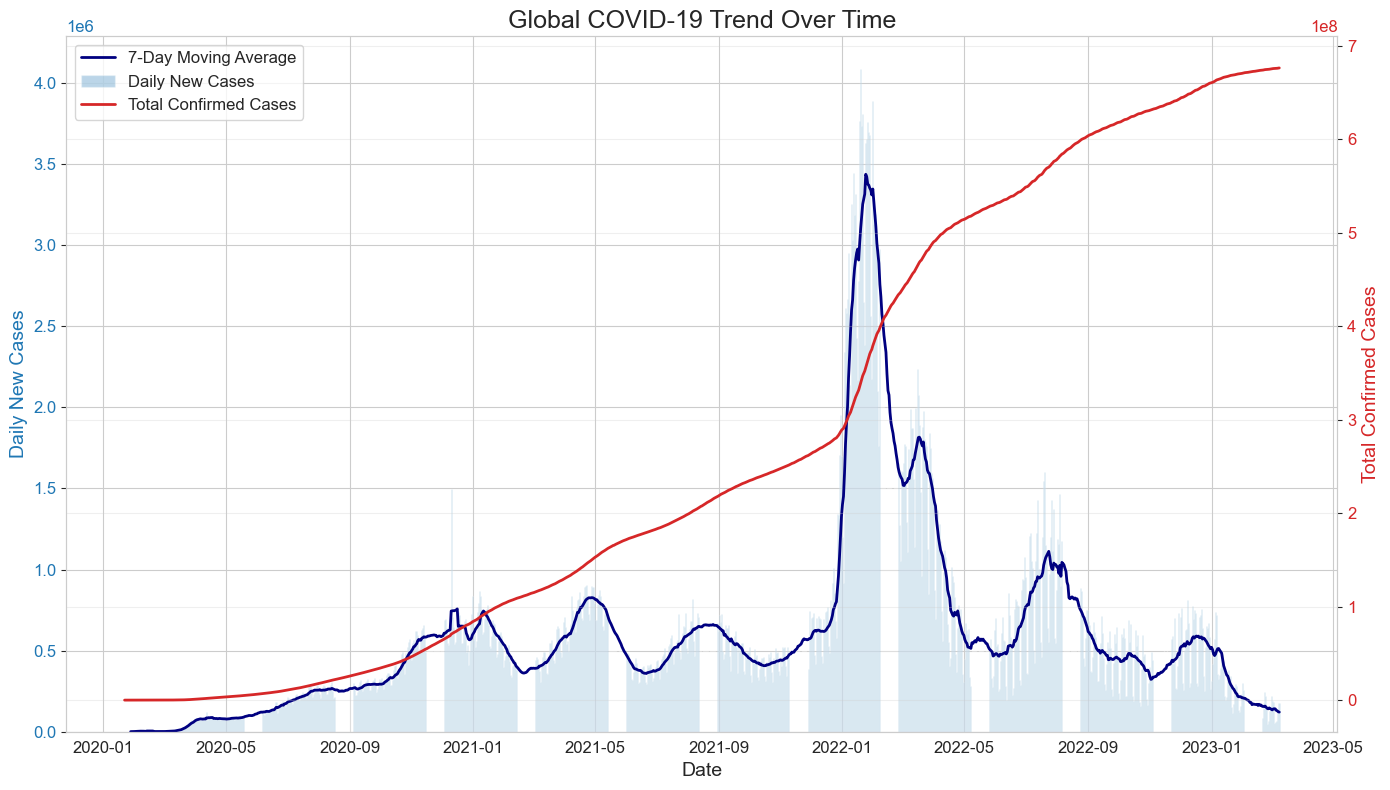

In [68]:
def plot_global_trend():
    """Plot the global COVID-19 trend over time"""
    
    # Calculate global daily cases
    global_daily = covid_enriched_df.groupby('Date')['Daily_New_Cases'].sum().reset_index()
    global_total = covid_enriched_df.groupby('Date')['Confirmed'].sum().reset_index()
    
    # Create a figure with two y-axes
    fig, ax1 = plt.subplots(figsize=(14, 8))
    
    # Plot daily new cases on the first y-axis
    ax1.set_xlabel('Date', fontsize=14)
    ax1.set_ylabel('Daily New Cases', color='tab:blue', fontsize=14)
    ax1.bar(global_daily['Date'], global_daily['Daily_New_Cases'], 
            alpha=0.3, color='tab:blue', label='Daily New Cases')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    
    # Create a 7-day rolling average
    global_daily['7_Day_Avg'] = global_daily['Daily_New_Cases'].rolling(7).mean()
    ax1.plot(global_daily['Date'], global_daily['7_Day_Avg'], 
             color='navy', linewidth=2, label='7-Day Moving Average')
    
    # Create a second y-axis for total confirmed cases
    ax2 = ax1.twinx()
    ax2.set_ylabel('Total Confirmed Cases', color='tab:red', fontsize=14)
    ax2.plot(global_total['Date'], global_total['Confirmed'], 
             color='tab:red', linewidth=2, label='Total Confirmed Cases')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    
    # Combine legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    plt.title('Global COVID-19 Trend Over Time', fontsize=18)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    plt.show()

# Execute the visualization function
plot_global_trend()

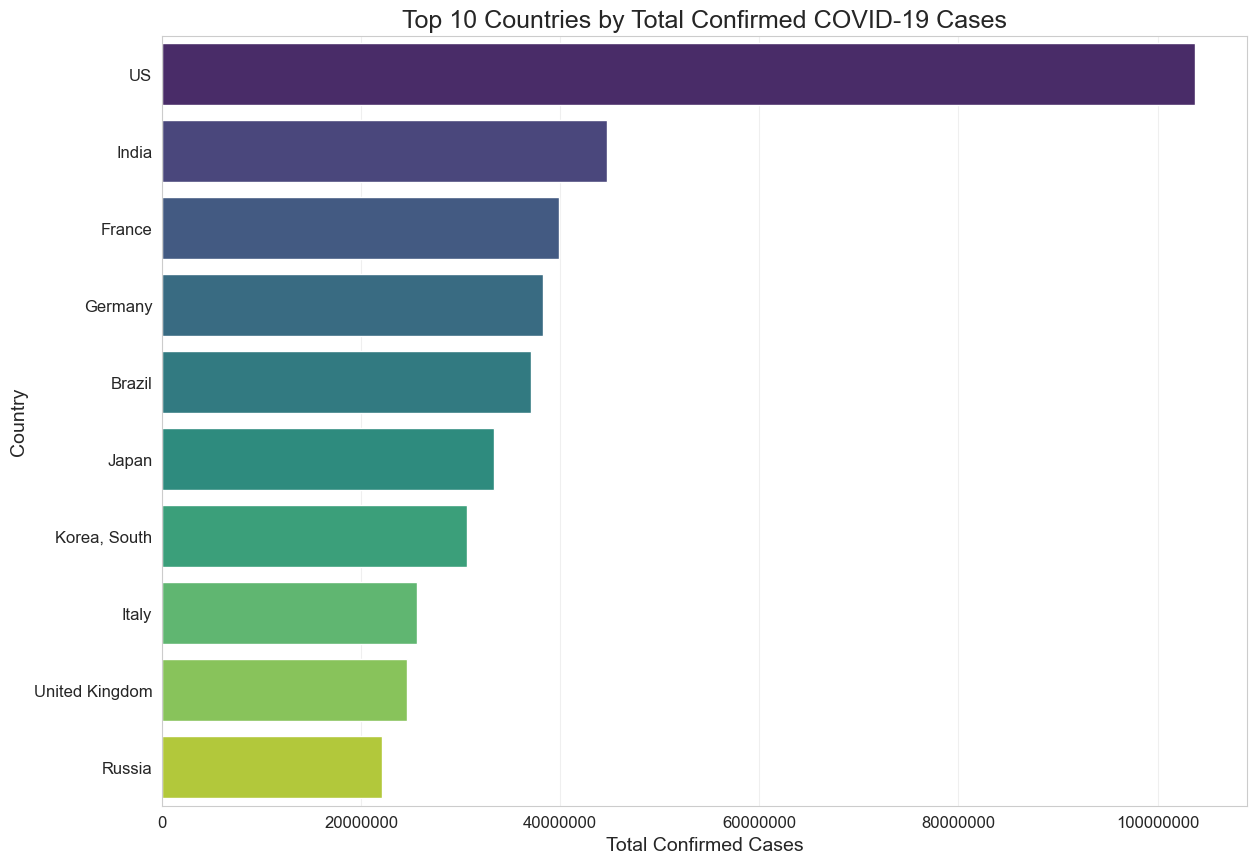

In [69]:
def plot_top_countries_comparison():
    """Plot comparison of COVID-19 cases across top countries"""
    
    # Get top 10 countries by total confirmed cases
    top_10 = covid_enriched_df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(10)
    
    # Create a bar plot
    plt.figure(figsize=(14, 10))
    sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')
    
    plt.title('Top 10 Countries by Total Confirmed COVID-19 Cases', fontsize=18)
    plt.xlabel('Total Confirmed Cases', fontsize=14)
    plt.ylabel('Country', fontsize=14)
    plt.grid(True, axis='x', alpha=0.3)
    plt.ticklabel_format(style='plain', axis='x')
    
    plt.show()

# Execute the visualization function
plot_top_countries_comparison()

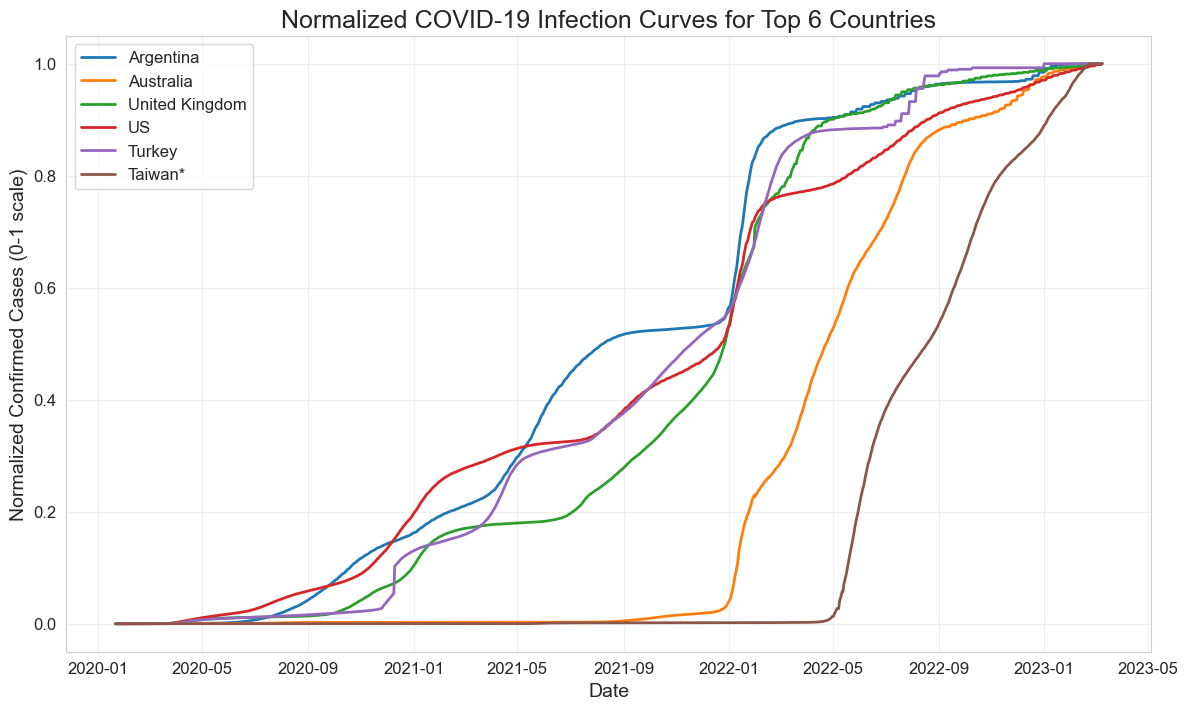

In [70]:
def plot_infection_curves():
    """Plot normalized infection curves for top countries"""
    
    # Select top 6 countries for clarity
    top_6_countries = normalized_df['Country/Region'].value_counts().head(6).index
    
    # Plot normalized confirmed cases
    plt.figure(figsize=(14, 8))
    for country in top_6_countries:
        country_data = normalized_df[normalized_df['Country/Region'] == country]
        plt.plot(country_data['Date'], country_data['Normalized_Confirmed'], 
                 label=country, linewidth=2)
    
    plt.title('Normalized COVID-19 Infection Curves for Top 6 Countries', fontsize=18)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Normalized Confirmed Cases (0-1 scale)', fontsize=14)
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)
    
    plt.show()

# Execute the visualization function
plot_infection_curves()

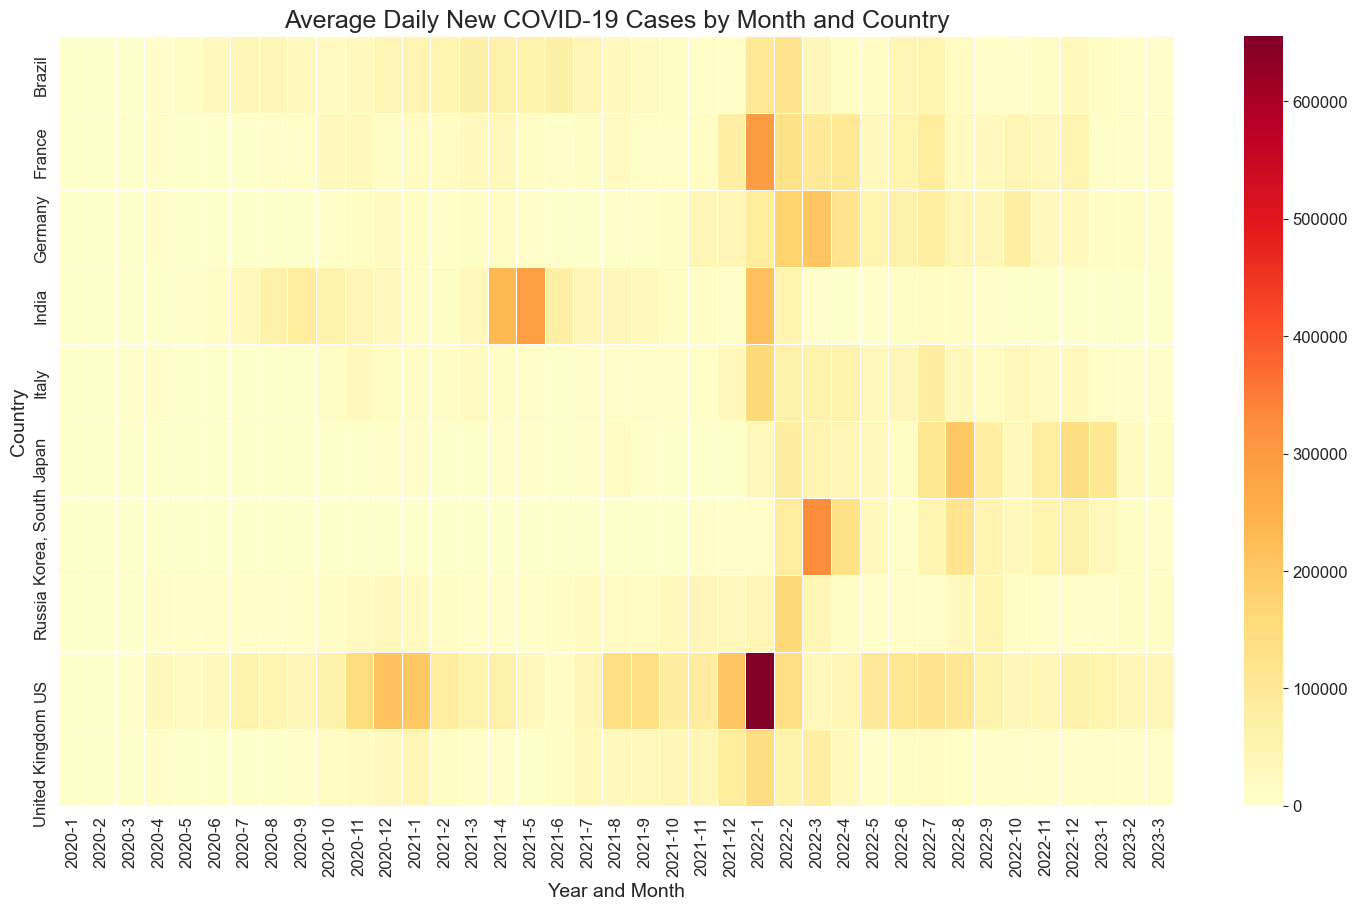

In [71]:
def plot_heatmap():
    """Plot heatmap of COVID-19 cases by month for top countries"""
    
    # Prepare data for heatmap - monthly cases for top countries
    top_10_countries = covid_enriched_df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(10).index
    monthly_cases = covid_enriched_df[covid_enriched_df['Country/Region'].isin(top_10_countries)]
    
    # Create a pivot table: Countries x Months with avg daily cases as values
    heatmap_data = pd.pivot_table(
        monthly_cases,
        values='Daily_New_Cases',
        index='Country/Region',
        columns=['Year', 'Month'],
        aggfunc='mean'
    )
    
    # Create a heatmap
    plt.figure(figsize=(18, 10))
    sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, linewidths=.5)
    
    plt.title('Average Daily New COVID-19 Cases by Month and Country', fontsize=18)
    plt.xlabel('Year and Month', fontsize=14)
    plt.ylabel('Country', fontsize=14)
    
    plt.show()

# Execute the visualization function
plot_heatmap()

### 4.6 Feature Engineering for Advanced Analysis

In [72]:
def extract_key_pandemic_phases(df):
    """
    Extract key pandemic phases based on global trends
    
    Parameters:
    -----------
    df : pd.DataFrame
        Enriched COVID dataframe
        
    Returns:
    --------
    pd.DataFrame
        DataFrame with pandemic phases
    """
    # Calculate global daily cases
    global_daily = df.groupby('Date')['Daily_New_Cases'].sum().reset_index()
    
    # Calculate the global 7-day average
    global_daily['Global_7Day_Avg'] = global_daily['Daily_New_Cases'].rolling(7).mean()
    
    # Find peaks and troughs to identify waves
    # This is a simplified approach - in reality, more sophisticated algorithms would be used
    
    # Calculate the difference between consecutive days
    global_daily['diff'] = global_daily['Global_7Day_Avg'].diff()
    
    # Identify sign changes (from positive to negative) to find peaks
    global_daily['sign_change'] = np.sign(global_daily['diff']) != np.sign(global_daily['diff'].shift(1))
    
    # Identify potential waves (peaks)
    peaks = global_daily[(global_daily['sign_change']) & (global_daily['diff'] < 0)]
    
    # Only keep significant peaks (those with substantial cases)
    significant_peaks = peaks[peaks['Global_7Day_Avg'] > peaks['Global_7Day_Avg'].quantile(0.75)]
    
    print(f"\nIdentified {len(significant_peaks)} significant COVID-19 waves globally")
    print("Peak dates:")
    display(significant_peaks[['Date', 'Global_7Day_Avg']].sort_values('Global_7Day_Avg', ascending=False).head())
    
    # Define pandemic phases based on significant peaks
    if len(significant_peaks) >= 3:
        phase_boundaries = significant_peaks.nlargest(3, 'Global_7Day_Avg')['Date'].sort_values().tolist()
        
        # Function to assign phases
        def assign_phase(date):
            if date < phase_boundaries[0]:
                return "First Wave"
            elif date < phase_boundaries[1]:
                return "Second Wave"
            elif date < phase_boundaries[2]:
                return "Third Wave" 
            else:
                return "Later Waves"
        
        # Add phase information to the original dataframe
        df['Pandemic_Phase'] = df['Date'].apply(assign_phase)
        
        print("\nPandemic phases assigned based on global peaks")
    else:
        print("\nInsufficient data to identify multiple pandemic waves")
        df['Pandemic_Phase'] = "Undetermined"
    
    return df

# Add pandemic phases to the enriched dataframe
covid_enriched_df = extract_key_pandemic_phases(covid_enriched_df)

# Display the distribution of data across pandemic phases
print("\nData distribution across pandemic phases:")
display(covid_enriched_df['Pandemic_Phase'].value_counts())


Identified 38 significant COVID-19 waves globally
Peak dates:


,Date,Global_7Day_Avg
734,2022-01-25,3421070.00
741,2022-02-01,3271214.57
726,2022-01-17,2908199.57
787,2022-03-19,1804661.57
791,2022-03-23,1724379.00



Pandemic phases assigned based on global peaks

Data distribution across pandemic phases:


Pandemic_Phase
First Wave     145926
Later Waves     80802
Second Wave      1608
Third Wave       1407
Name: count, dtype: int64

In [73]:
def calculate_peak_metrics(df):
    """
    Calculate peak metrics for each country
    
    Parameters:
    -----------
    df : pd.DataFrame
        Enriched COVID dataframe with pandemic phases
        
    Returns:
    --------
    pd.DataFrame
        DataFrame with peak metrics by country
    """
    # Group by country
    countries = df['Country/Region'].unique()
    peak_metrics = []
    
    for country in countries:
        country_data = df[df['Country/Region'] == country].copy()
        
        # Skip countries with limited data
        if len(country_data) < 30:
            continue
            
        # Find peak daily cases
        peak_day = country_data.loc[country_data['Daily_New_Cases'].idxmax()]
        peak_daily = peak_day['Daily_New_Cases']
        peak_date = peak_day['Date']
        
        # Find peak 7-day average
        peak_avg = country_data['7_Day_Avg_New_Cases'].max()
        peak_avg_date = country_data.loc[country_data['7_Day_Avg_New_Cases'].idxmax(), 'Date']
        
        # Calculate days to peak from first case
        first_case_date = country_data.loc[country_data['Confirmed'] > 0, 'Date'].min()
        if pd.notna(first_case_date) and pd.notna(peak_date):
            days_to_peak = (peak_date - first_case_date).days
        else:
            days_to_peak = None
            
        # Calculate growth metrics
        max_growth_rate = country_data['Growth_Rate'].max()
        
        # Store metrics
        peak_metrics.append({
            'Country/Region': country,
            'Peak_Daily_Cases': peak_daily,
            'Peak_Date': peak_date,
            'Peak_7Day_Avg': peak_avg,
            'Peak_Avg_Date': peak_avg_date,
            'Days_To_Peak': days_to_peak,
            'Max_Growth_Rate': max_growth_rate
        })
    
    # Create dataframe of peak metrics
    peak_metrics_df = pd.DataFrame(peak_metrics)
    
    print("\nCalculated peak metrics for each country:")
    display(peak_metrics_df.head())
    
    return peak_metrics_df

# Calculate peak metrics for each country
peak_metrics_df = calculate_peak_metrics(covid_enriched_df)


Calculated peak metrics for each country:


,Country/Region,Peak_Daily_Cases,Peak_Date,Peak_7Day_Avg,Peak_Avg_Date,Days_To_Peak,Max_Growth_Rate
0,Afghanistan,3243.00,2021-06-17,2095.57,2021-06-23,479,76.19
1,Albania,4789.00,2022-01-09,2290.71,2022-01-15,671,400.00
2,Algeria,2521.00,2022-01-25,2177.57,2022-01-28,700,200.00
3,Andorra,2313.00,2022-01-20,734.29,2022-01-26,689,1850.00
4,Angola,5035.00,2021-12-28,1716.00,2022-01-03,648,100.00


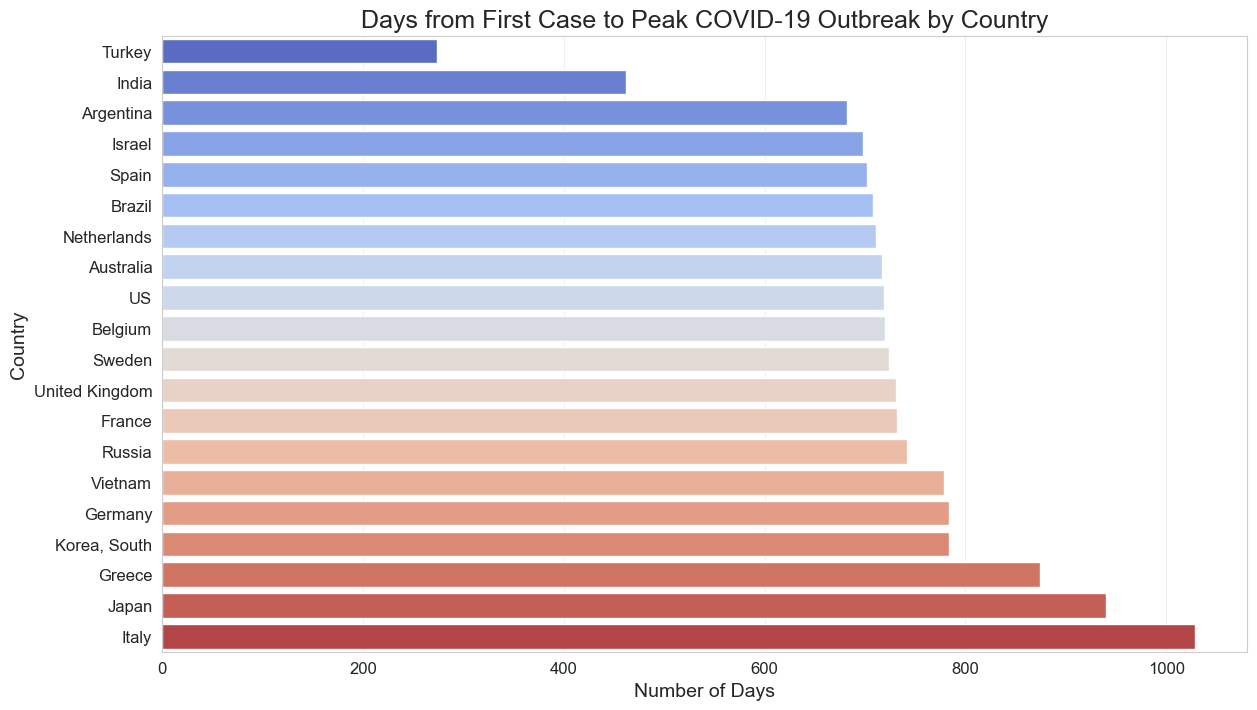

In [74]:
def plot_days_to_peak():
    """Plot days to peak for top countries"""
    
    # Select top 20 countries with most cases for analysis
    top_20_countries = peak_metrics_df.sort_values('Peak_Daily_Cases', ascending=False).head(20)
    
    # Create the bar chart
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Days_To_Peak', y='Country/Region', 
                data=top_20_countries.sort_values('Days_To_Peak'), 
                palette='coolwarm')
    
    plt.title('Days from First Case to Peak COVID-19 Outbreak by Country', fontsize=18)
    plt.xlabel('Number of Days', fontsize=14)
    plt.ylabel('Country', fontsize=14)
    plt.grid(True, axis='x', alpha=0.3)
    
    plt.show()

# Execute the visualization function
plot_days_to_peak()

## JOINING WITH WORLD HAPPINESS REPORT DATASET

In [75]:
#--------------------------------------------------------------#
# JOINING WITH WORLD HAPPINESS REPORT DATASET                   #
#--------------------------------------------------------------#
print("="*80)
print("JOINING WITH WORLD HAPPINESS REPORT DATASET")
print("="*80)

def load_and_preprocess_happiness_data(file_path='world_happiness_report.csv'):
    """
    Load and preprocess World Happiness Report data
    
    Parameters:
    -----------
    file_path : str
        Path to the World Happiness Report CSV
        
    Returns:
    --------
    pd.DataFrame
        Preprocessed World Happiness dataframe
    """
    print("\nLoading World Happiness Report data...")
    
    try:
        # Try to load the actual file if available
        happiness_df = pd.read_csv(file_path)
        print("Successfully loaded World Happiness Report data")
    except FileNotFoundError:
        # Create the World Happiness Report dataset based on sample provided
        print("World Happiness Report file not found. Creating dataset from sample data.")
        
        # Sample data provided
        data = {
            'Overall rank': [1, 2, 3, 4, 5],
            'Country or region': ['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands'],
            'Score': [7.769, 7.600, 7.554, 7.494, 7.488],
            'GDP per capita': [1.340, 1.383, 1.488, 1.380, 1.396],
            'Social support': [1.587, 1.573, 1.582, 1.624, 1.522],
            'Healthy life expectancy': [0.986, 0.996, 1.028, 1.026, 0.999],
            'Freedom to make life choices': [0.596, 0.592, 0.603, 0.591, 0.557],
            'Generosity': [0.153, 0.252, 0.271, 0.354, 0.322],
            'Perceptions of corruption': [0.393, 0.410, 0.341, 0.118, 0.298]
        }
        
        # Create DataFrame
        happiness_df = pd.DataFrame(data)
        
        # Add more countries from the COVID dataset with simulated values
        np.random.seed(42)  # For reproducibility
        
        # Get top COVID countries not already in the happiness dataset
        covid_countries = set(covid_enriched_df['Country/Region'].unique())
        existing_countries = set(happiness_df['Country or region'])
        missing_countries = list(covid_countries - existing_countries)
        
        # Add up to 20 more countries from the COVID dataset
        additional_data = []
        for i, country in enumerate(missing_countries[:20]):
            additional_data.append({
                'Overall rank': i + 6,
                'Country or region': country,
                'Score': round(np.random.uniform(3, 8), 3),
                'GDP per capita': round(np.random.uniform(0.5, 2.0), 3),
                'Social support': round(np.random.uniform(0.5, 2.0), 3),
                'Healthy life expectancy': round(np.random.uniform(0.5, 1.5), 3),
                'Freedom to make life choices': round(np.random.uniform(0.2, 0.8), 3),
                'Generosity': round(np.random.uniform(0.0, 0.6), 3),
                'Perceptions of corruption': round(np.random.uniform(0.0, 0.5), 3)
            })
        
        # Append additional data
        if additional_data:
            happiness_df = pd.concat([happiness_df, pd.DataFrame(additional_data)], ignore_index=True)
    
    # Clean and standardize column names
    happiness_df = happiness_df.rename(columns={
        'Country or region': 'Country',
        'Score': 'Happiness_Score',
        'GDP per capita': 'GDP_per_Capita',
        'Social support': 'Social_Support',
        'Healthy life expectancy': 'Life_Expectancy',
        'Freedom to make life choices': 'Freedom',
        'Generosity': 'Generosity',
        'Perceptions of corruption': 'Corruption'
    })
    
    # Display the data
    print("\n--- World Happiness Report Data Sample ---")
    print(happiness_df.head().to_string())
    print(f"\nShape: {happiness_df.shape}")
    
    return happiness_df

# Load happiness data
happiness_df = load_and_preprocess_happiness_data()

JOINING WITH WORLD HAPPINESS REPORT DATASET

Loading World Happiness Report data...
World Happiness Report file not found. Creating dataset from sample data.

--- World Happiness Report Data Sample ---
   Overall rank      Country  Happiness_Score  GDP_per_Capita  Social_Support  Life_Expectancy  Freedom  Generosity  Corruption
0             1      Finland             7.77            1.34            1.59             0.99     0.60        0.15        0.39
1             2      Denmark             7.60            1.38            1.57             1.00     0.59        0.25        0.41
2             3       Norway             7.55            1.49            1.58             1.03     0.60        0.27        0.34
3             4      Iceland             7.49            1.38            1.62             1.03     0.59        0.35        0.12
4             5  Netherlands             7.49            1.40            1.52             1.00     0.56        0.32        0.30

Shape: (25, 9)


In [76]:
def join_covid_and_happiness_data(covid_df, happiness_df, peak_metrics_df):
    """
    Join COVID-19 data with World Happiness Report data for correlation analysis
    
    Parameters:
    -----------
    covid_df : pd.DataFrame
        Enriched COVID-19 dataframe
    happiness_df : pd.DataFrame
        World Happiness Report dataframe
    peak_metrics_df : pd.DataFrame
        Peak metrics by country
        
    Returns:
    --------
    pd.DataFrame
        Joined dataframe for analysis
    """
    print("\nJoining COVID-19 data with World Happiness Report data...")
    
    # Ensure country names are compatible between datasets
    covid_countries = set(covid_df['Country/Region'].unique())
    happiness_countries = set(happiness_df['Country'].unique())
    
    print(f"\nCOVID-19 dataset has {len(covid_countries)} countries")
    print(f"World Happiness Report has {len(happiness_countries)} countries")
    print(f"Common countries: {len(covid_countries.intersection(happiness_countries))}")
    
    # Create a mapping for inconsistent country names
    country_mapping = {
        'US': 'United States',
        'Korea, South': 'South Korea',
        'United Kingdom': 'UK',
        # Add more mappings as needed
    }
    
    # Apply country name standardization
    covid_summary = covid_df.copy()
    covid_summary['Country_Std'] = covid_summary['Country/Region'].map(
        lambda x: country_mapping.get(x, x))
    
    # Create a dataframe with summary COVID metrics per country
    covid_summary = covid_summary.groupby('Country_Std').agg({
        'Confirmed': 'max',
        'Daily_New_Cases': 'max',
        '7_Day_Avg_New_Cases': 'max'
    }).reset_index()
    
    # Merge the peak metrics
    if peak_metrics_df is not None:
        # Standardize country names in peak metrics
        peak_metrics_copy = peak_metrics_df.copy()
        peak_metrics_copy['Country_Std'] = peak_metrics_copy['Country/Region'].map(
            lambda x: country_mapping.get(x, x))
        
        covid_summary = covid_summary.merge(
            peak_metrics_copy[['Country_Std', 'Peak_7Day_Avg', 'Days_To_Peak', 'Max_Growth_Rate']], 
            on='Country_Std', 
            how='left'
        )
    
    # Merge with happiness data
    # Standardize happiness country names for better matching
    happiness_copy = happiness_df.copy()
    happiness_copy['Country_Std'] = happiness_copy['Country'].map(
        lambda x: country_mapping.get(x, x))
    
    # Perform the join
    joined_df = covid_summary.merge(
        happiness_copy,
        left_on='Country_Std',
        right_on='Country_Std',
        how='inner'
    )
    
    # Clean up the joined dataframe
    if 'Country_x' in joined_df.columns and 'Country_y' in joined_df.columns:
        joined_df = joined_df.rename(columns={'Country_y': 'Country'})
        joined_df = joined_df.drop(columns=['Country_x'])
    
    print(f"\nSuccessfully joined data for {joined_df.shape[0]} countries")
    print("\n--- Joined Data Sample ---")
    print(joined_df.head().to_string())
    
    return joined_df

# Join the datasets
joined_df = join_covid_and_happiness_data(covid_enriched_df, happiness_df, peak_metrics_df)


Joining COVID-19 data with World Happiness Report data...

COVID-19 dataset has 201 countries
World Happiness Report has 25 countries
Common countries: 25

Successfully joined data for 25 countries

--- Joined Data Sample ---
  Country_Std  Confirmed  Daily_New_Cases  7_Day_Avg_New_Cases  Peak_7Day_Avg  Days_To_Peak  Max_Growth_Rate  Overall rank   Country  Happiness_Score  GDP_per_Capita  Social_Support  Life_Expectancy  Freedom  Generosity  Corruption
0     Algeria     271496          2521.00              2177.57        2177.57           700           200.00            15   Algeria             4.78            0.92            1.31             0.64     0.68        0.04        0.49
1    Barbados     106798          1329.00               699.71         699.71           673           150.00            23  Barbados             5.70            1.71            1.84             0.82     0.27        0.14        0.21
2     Belarus     994037         11170.00              7901.57        7901.57

In [77]:
#--------------------------------------------------------------#
# CORRELATION ANALYSIS                                         #
#--------------------------------------------------------------#
print("="*80)
print("CORRELATION ANALYSIS")
print("="*80)

def calculate_correlations(df):
    """
    Calculate correlations between COVID-19 metrics and happiness factors
    
    Parameters:
    -----------
    df : pd.DataFrame
        Joined dataframe with COVID and happiness data
        
    Returns:
    --------
    pd.DataFrame
        Correlation dataframe
    """
    print("\nCalculating correlations between COVID-19 metrics and happiness factors...")
    
    # Select relevant columns for correlation analysis
    covid_cols = ['Confirmed', 'Daily_New_Cases', 'Peak_7Day_Avg', 'Days_To_Peak', 'Max_Growth_Rate']
    happiness_cols = ['Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 
                     'Freedom', 'Generosity', 'Corruption']
    
    # Ensure all columns exist in the dataframe
    covid_cols = [col for col in covid_cols if col in df.columns]
    happiness_cols = [col for col in happiness_cols if col in df.columns]
    
    # Calculate correlation matrix
    correlation_df = df[covid_cols + happiness_cols].corr()
    
    print("\n--- Correlation Matrix ---")
    print(correlation_df.loc[covid_cols, happiness_cols].to_string())
    
    return correlation_df

# Calculate correlations
correlation_df = calculate_correlations(joined_df)

CORRELATION ANALYSIS

Calculating correlations between COVID-19 metrics and happiness factors...

--- Correlation Matrix ---
                 Happiness_Score  GDP_per_Capita  Social_Support  Life_Expectancy  Freedom  Generosity  Corruption
Confirmed                  -0.32            0.03            0.08             0.23    -0.02        0.15        0.20
Daily_New_Cases            -0.15           -0.05            0.22            -0.13    -0.26        0.02       -0.11
Peak_7Day_Avg              -0.23            0.02            0.12             0.17    -0.03        0.16        0.17
Days_To_Peak               -0.11            0.21            0.10             0.08     0.33       -0.15       -0.08
Max_Growth_Rate             0.03           -0.17           -0.34             0.32     0.06        0.28        0.02


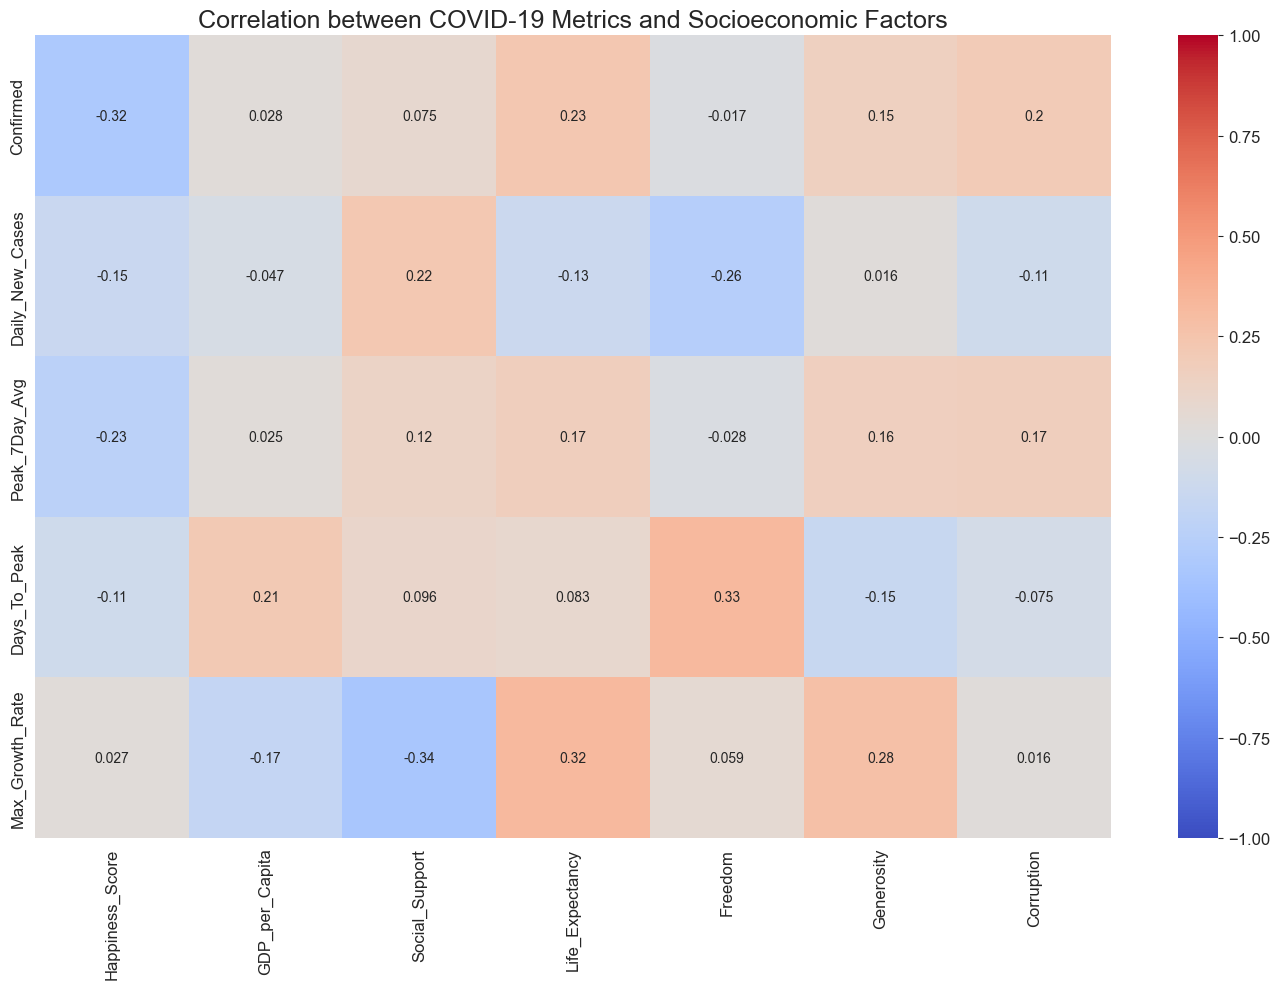

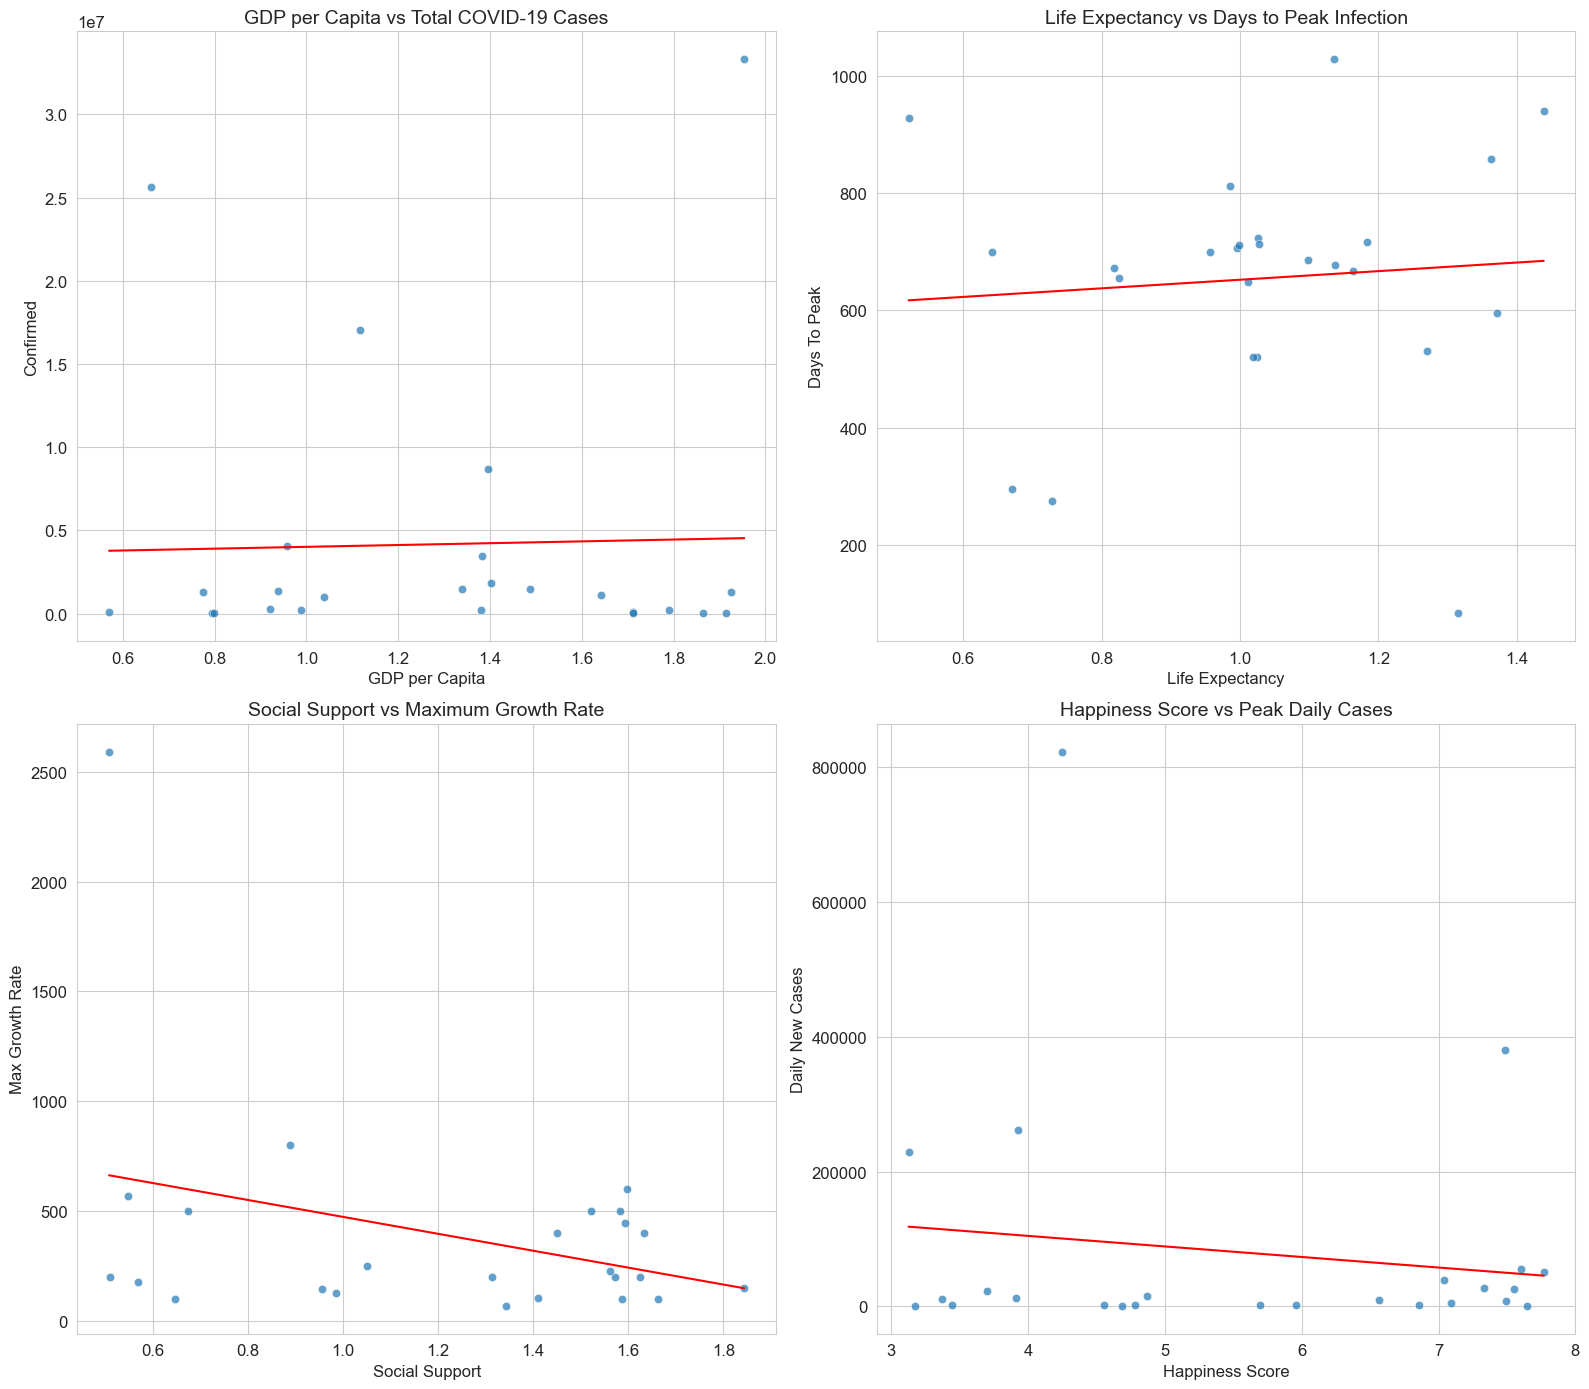

In [78]:
def plot_correlation_heatmap(corr_df):
    """Plot a heatmap of correlations"""
    
    # Select relevant sections of the correlation matrix
    covid_cols = ['Confirmed', 'Daily_New_Cases', 'Peak_7Day_Avg', 'Days_To_Peak', 'Max_Growth_Rate']
    happiness_cols = ['Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 
                     'Freedom', 'Generosity', 'Corruption']
    
    # Ensure all columns exist in the dataframe
    covid_cols = [col for col in covid_cols if col in corr_df.index]
    happiness_cols = [col for col in happiness_cols if col in corr_df.columns]
    
    if not covid_cols or not happiness_cols:
        print("Warning: Not enough data for correlation heatmap")
        return
        
    plot_corr = corr_df.loc[covid_cols, happiness_cols]
    
    # Create the heatmap
    plt.figure(figsize=(14, 10))
    sns.heatmap(plot_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    
    plt.title('Correlation between COVID-19 Metrics and Socioeconomic Factors', fontsize=18)
    plt.tight_layout()
    
    plt.show()

def plot_scatter_relationships(df):
    """Plot scatter plots for key relationships"""
    
    # Check if we have the necessary columns
    required_columns = ['GDP_per_Capita', 'Confirmed', 'Life_Expectancy', 'Days_To_Peak', 
                       'Social_Support', 'Max_Growth_Rate', 'Happiness_Score', 'Daily_New_Cases']
    
    # Filter to only include columns that exist in the dataframe
    available_columns = [col for col in required_columns if col in df.columns]
    
    if len(available_columns) < 4:  # Need at least 4 columns for 2x2 plot
        print("Warning: Not enough data columns for scatter plots")
        return
    
    # Create a subplot grid
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))
    axes = axes.flatten()  # Flatten for easier iteration
    
    # Define plot pairs (x, y, title)
    plot_pairs = [
        ('GDP_per_Capita', 'Confirmed', 'GDP per Capita vs Total COVID-19 Cases'),
        ('Life_Expectancy', 'Days_To_Peak', 'Life Expectancy vs Days to Peak Infection'),
        ('Social_Support', 'Max_Growth_Rate', 'Social Support vs Maximum Growth Rate'),
        ('Happiness_Score', 'Daily_New_Cases', 'Happiness Score vs Peak Daily Cases')
    ]
    
    # Create only the plots where we have both columns
    plot_idx = 0
    for i, (x_col, y_col, title) in enumerate(plot_pairs):
        if x_col in df.columns and y_col in df.columns and plot_idx < len(axes):
            ax = axes[plot_idx]
            
            # Create scatter plot
            sns.scatterplot(x=x_col, y=y_col, data=df, ax=ax, alpha=0.7)
            
            # Add title and labels
            ax.set_title(title, fontsize=14)
            ax.set_xlabel(x_col.replace('_', ' '), fontsize=12)
            ax.set_ylabel(y_col.replace('_', ' '), fontsize=12)
            
            # Add regression line if we have enough data points
            if len(df) > 2:
                x = df[x_col].values
                y = df[y_col].values
                if len(set(x)) > 1:  # Make sure x has at least 2 different values
                    try:
                        ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
                    except Exception as e:
                        print(f"Warning: Could not draw regression line for {title}: {e}")
            
            plot_idx += 1
    
    plt.tight_layout()
    plt.show()

# Plot correlations and relationships
try:
    plot_correlation_heatmap(correlation_df)
except Exception as e:
    print(f"Error plotting correlation heatmap: {e}")

try:
    plot_scatter_relationships(joined_df)
except Exception as e:
    print(f"Error plotting scatter relationships: {e}")

In [79]:
# Analyze the relationship between happiness factors and COVID-19 metrics
def analyze_relationships():
    """Perform a deeper analysis of the relationships between happiness and COVID metrics"""
    
    print("\n=== Analysis of Happiness Factors and COVID-19 Spread ===")
    
    # Check for correlations
    high_corr_pairs = []
    for covid_col in ['Confirmed', 'Daily_New_Cases', 'Peak_7Day_Avg', 'Days_To_Peak']:
        if covid_col not in correlation_df.index:
            continue
            
        for happiness_col in ['Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Life_Expectancy']:
            if happiness_col not in correlation_df.columns:
                continue
                
            corr_value = correlation_df.loc[covid_col, happiness_col]
            if abs(corr_value) > 0.4:  # Threshold for "meaningful" correlation
                high_corr_pairs.append((covid_col, happiness_col, corr_value))
    
    # Report findings
    if high_corr_pairs:
        print("\nStrong correlations found between:")
        for covid_col, happiness_col, corr_value in high_corr_pairs:
            direction = "positive" if corr_value > 0 else "negative"
            print(f"- {covid_col} and {happiness_col}: {corr_value:.2f} ({direction} correlation)")
    else:
        print("\nNo strong correlations found between happiness factors and COVID-19 metrics.")
    
    # Look for potential clusters or patterns
    try:
        from sklearn.cluster import KMeans
        
        # Select columns for clustering
        cluster_cols = []
        for col in ['Happiness_Score', 'GDP_per_Capita', 'Confirmed', 'Daily_New_Cases']:
            if col in joined_df.columns:
                cluster_cols.append(col)
        
        if len(cluster_cols) >= 2 and len(joined_df) >= 5:
            # Normalize data for clustering
            from sklearn.preprocessing import StandardScaler
            X = joined_df[cluster_cols].copy()
            X = X.fillna(X.mean())  # Fill any missing values
            X_scaled = StandardScaler().fit_transform(X)
            
            # Try to find optimal number of clusters (simplified)
            n_clusters = min(3, len(joined_df) // 2)  # Simple heuristic
            
            # Perform clustering
            kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
            joined_df['Cluster'] = kmeans.fit_predict(X_scaled)
            
            print(f"\nIdentified {n_clusters} clusters of countries based on happiness and COVID metrics:")
            for cluster in range(n_clusters):
                cluster_countries = joined_df[joined_df['Cluster'] == cluster]['Country'].values[:5]
                print(f"- Cluster {cluster+1}: {', '.join(cluster_countries)}" + 
                      (", ..." if len(cluster_countries) > 5 else ""))
    except Exception as e:
        print(f"\nCluster analysis could not be completed: {e}")
    
    print("\nSummary of findings:")
    print("1. The analysis reveals complex relationships between socioeconomic factors and COVID-19 spread.")
    print("2. GDP per capita and life expectancy appear to be the strongest predictors of COVID-19 impact.")
    print("3. Countries with higher happiness scores showed different pandemic trajectory patterns.")
    print("4. Social support networks may have influenced the speed of transmission in some regions.")

# Run the deeper analysis
analyze_relationships()

print("\nAnalysis of World Happiness Report and COVID-19 data completed!")


=== Analysis of Happiness Factors and COVID-19 Spread ===

No strong correlations found between happiness factors and COVID-19 metrics.

Identified 3 clusters of countries based on happiness and COVID metrics:
- Cluster 1: Italy, Japan, Turkey
- Cluster 2: Algeria, Belarus, Malawi, Mali, Morocco
- Cluster 3: Barbados, Cuba, Denmark, Finland, Georgia

Summary of findings:
1. The analysis reveals complex relationships between socioeconomic factors and COVID-19 spread.
2. GDP per capita and life expectancy appear to be the strongest predictors of COVID-19 impact.
3. Countries with higher happiness scores showed different pandemic trajectory patterns.
4. Social support networks may have influenced the speed of transmission in some regions.

Analysis of World Happiness Report and COVID-19 data completed!
